# Data Cleaning

Import important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Trends In DS/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Check null values :

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Check for duplicated data :

In [ ]:
duplicates = data[data.duplicated()]
duplicates

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


Drop the duplicated data :

In [ ]:
data = data.drop_duplicates()

# Exploratory Data Analysis

EDA Distribution Analysis

Numerical Features :

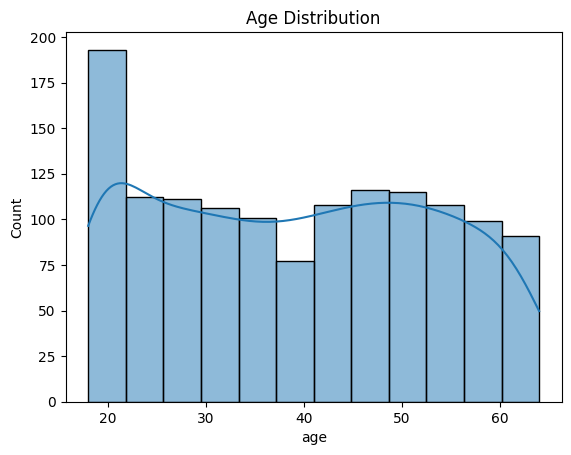

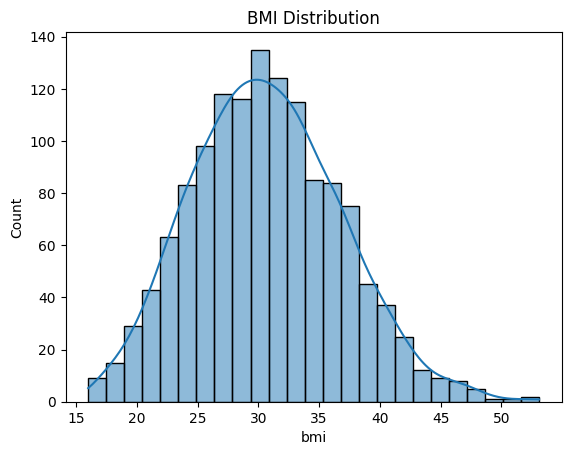

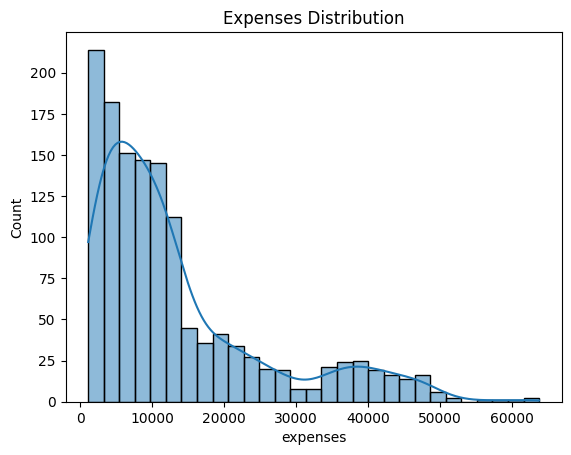

In [ ]:
# Distribution of numerical features
sns.histplot(data['age'], kde = True)
plt.title('Age Distribution')
plt.show()

sns.histplot(data['bmi'], kde = True)
plt.title('BMI Distribution')
plt.show()

sns.histplot(data['expenses'], kde = True)
plt.title('Expenses Distribution')
plt.show()

Identify Outliers

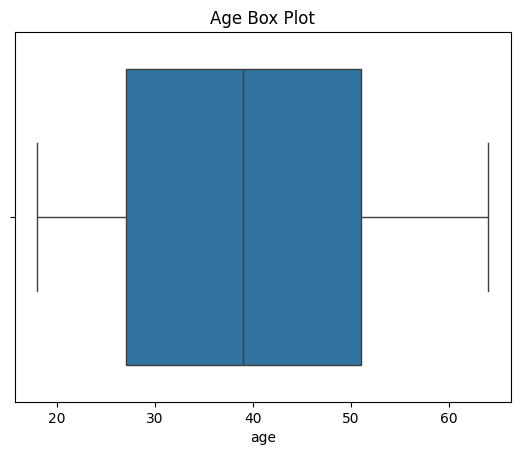

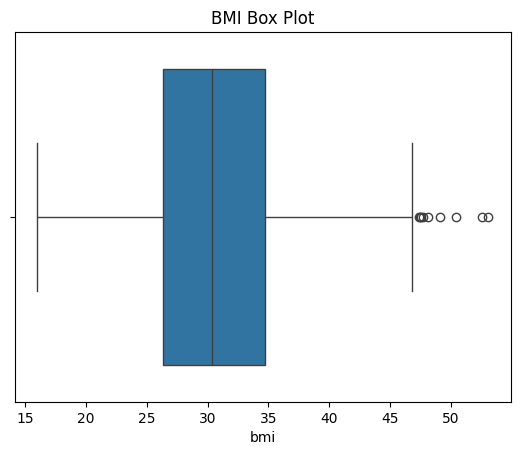

In [ ]:
# Using boxplots to identify outliers
sns.boxplot(x = data['age'])
plt.title('Age Box Plot')
plt.show()

sns.boxplot(x = data['bmi'])
plt.title('BMI Box Plot')
plt.show()

There are outliers in BMI column. In order to make our model more robust and accurate, we need to impute the outliers with the median value (as mean value is highly influenced by the outliers)

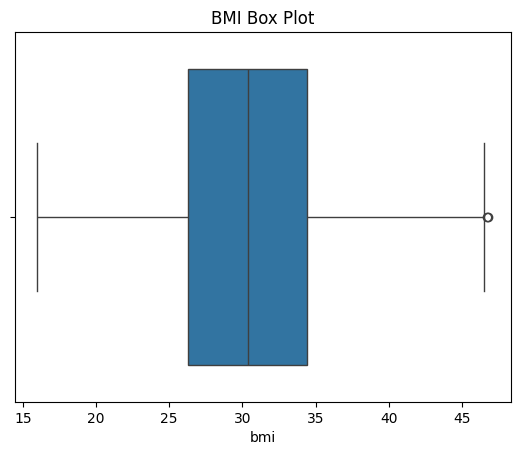

In [ ]:
# Identify outliers bounds in 'bmi'
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
bmi_lower = Q1 - 1.5 * IQR
bmi_upper = Q3 + 1.5 * IQR
# Replace the outliers with median value
data['bmi'] = np.where((data['bmi'] < bmi_lower) | (data['bmi'] > bmi_upper), data['bmi'].median(), data['bmi'])

# Show box plots of a new data with outliers replaced by median
sns.boxplot(x = data['bmi'])
plt.title('BMI Box Plot')
plt.show()

In [ ]:
data['bmi'].max()

46.8

Categorical Features :

<ipython-input-52-fd47ec6f7214>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i + 1)


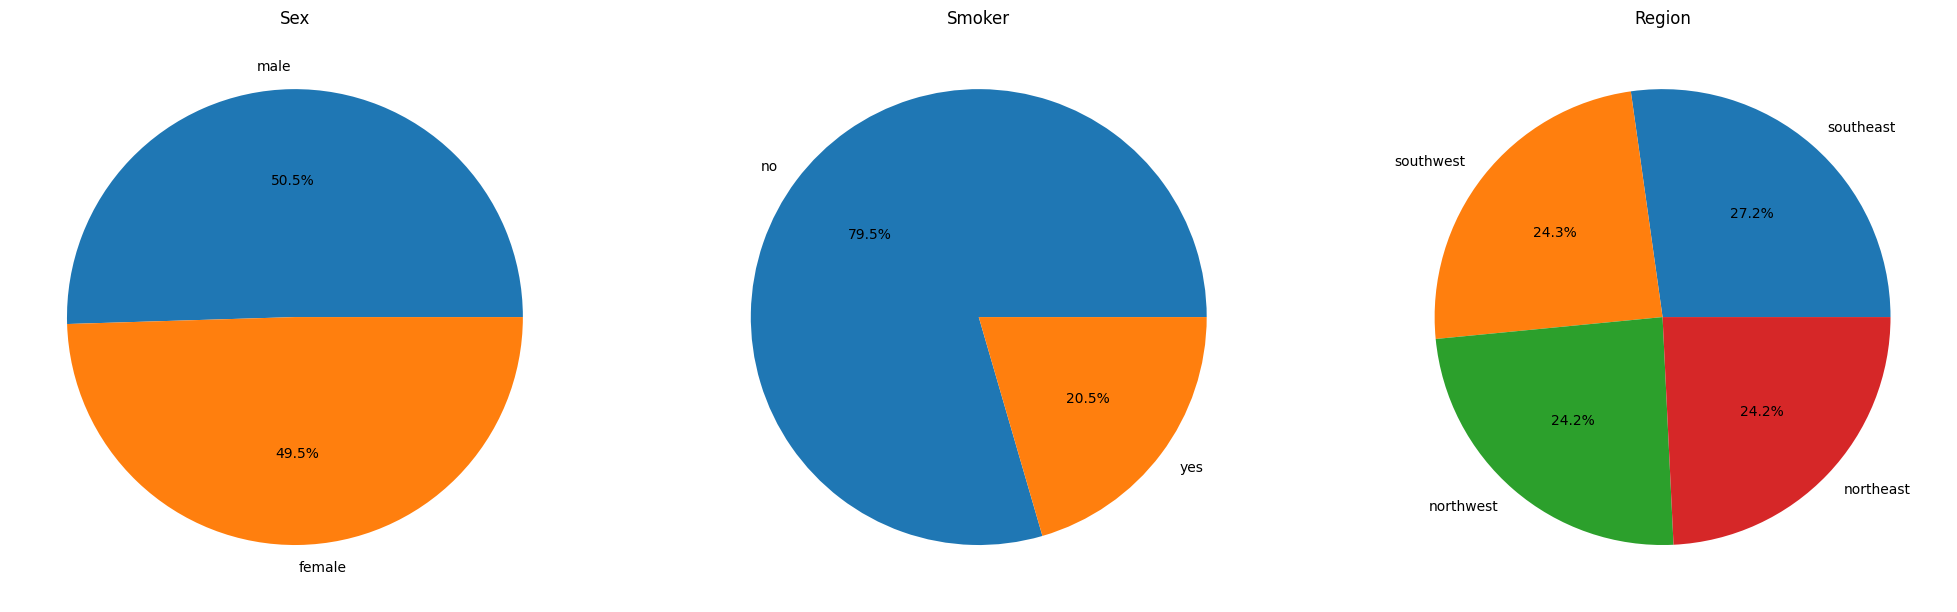

In [ ]:
# Pie chart for sex, smoker, and region column

features = ['sex', 'smoker', 'region']
plt.subplots(figsize = (25,10))
for i, col in enumerate(features):
  plt.subplot(1, 3, i + 1)

  x = data[col].value_counts()
  plt.pie(x.values, labels = x.index, autopct = '%1.1f%%')

  plt.title(col.capitalize())

plt.show()

The distribution of 'sex' and 'region' is equally distributed, meanwhile the distribution for 'smoker' is in ratio of 80:20

Compares the Means Insurance Prices between different group



<ipython-input-53-7489f83bca57>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


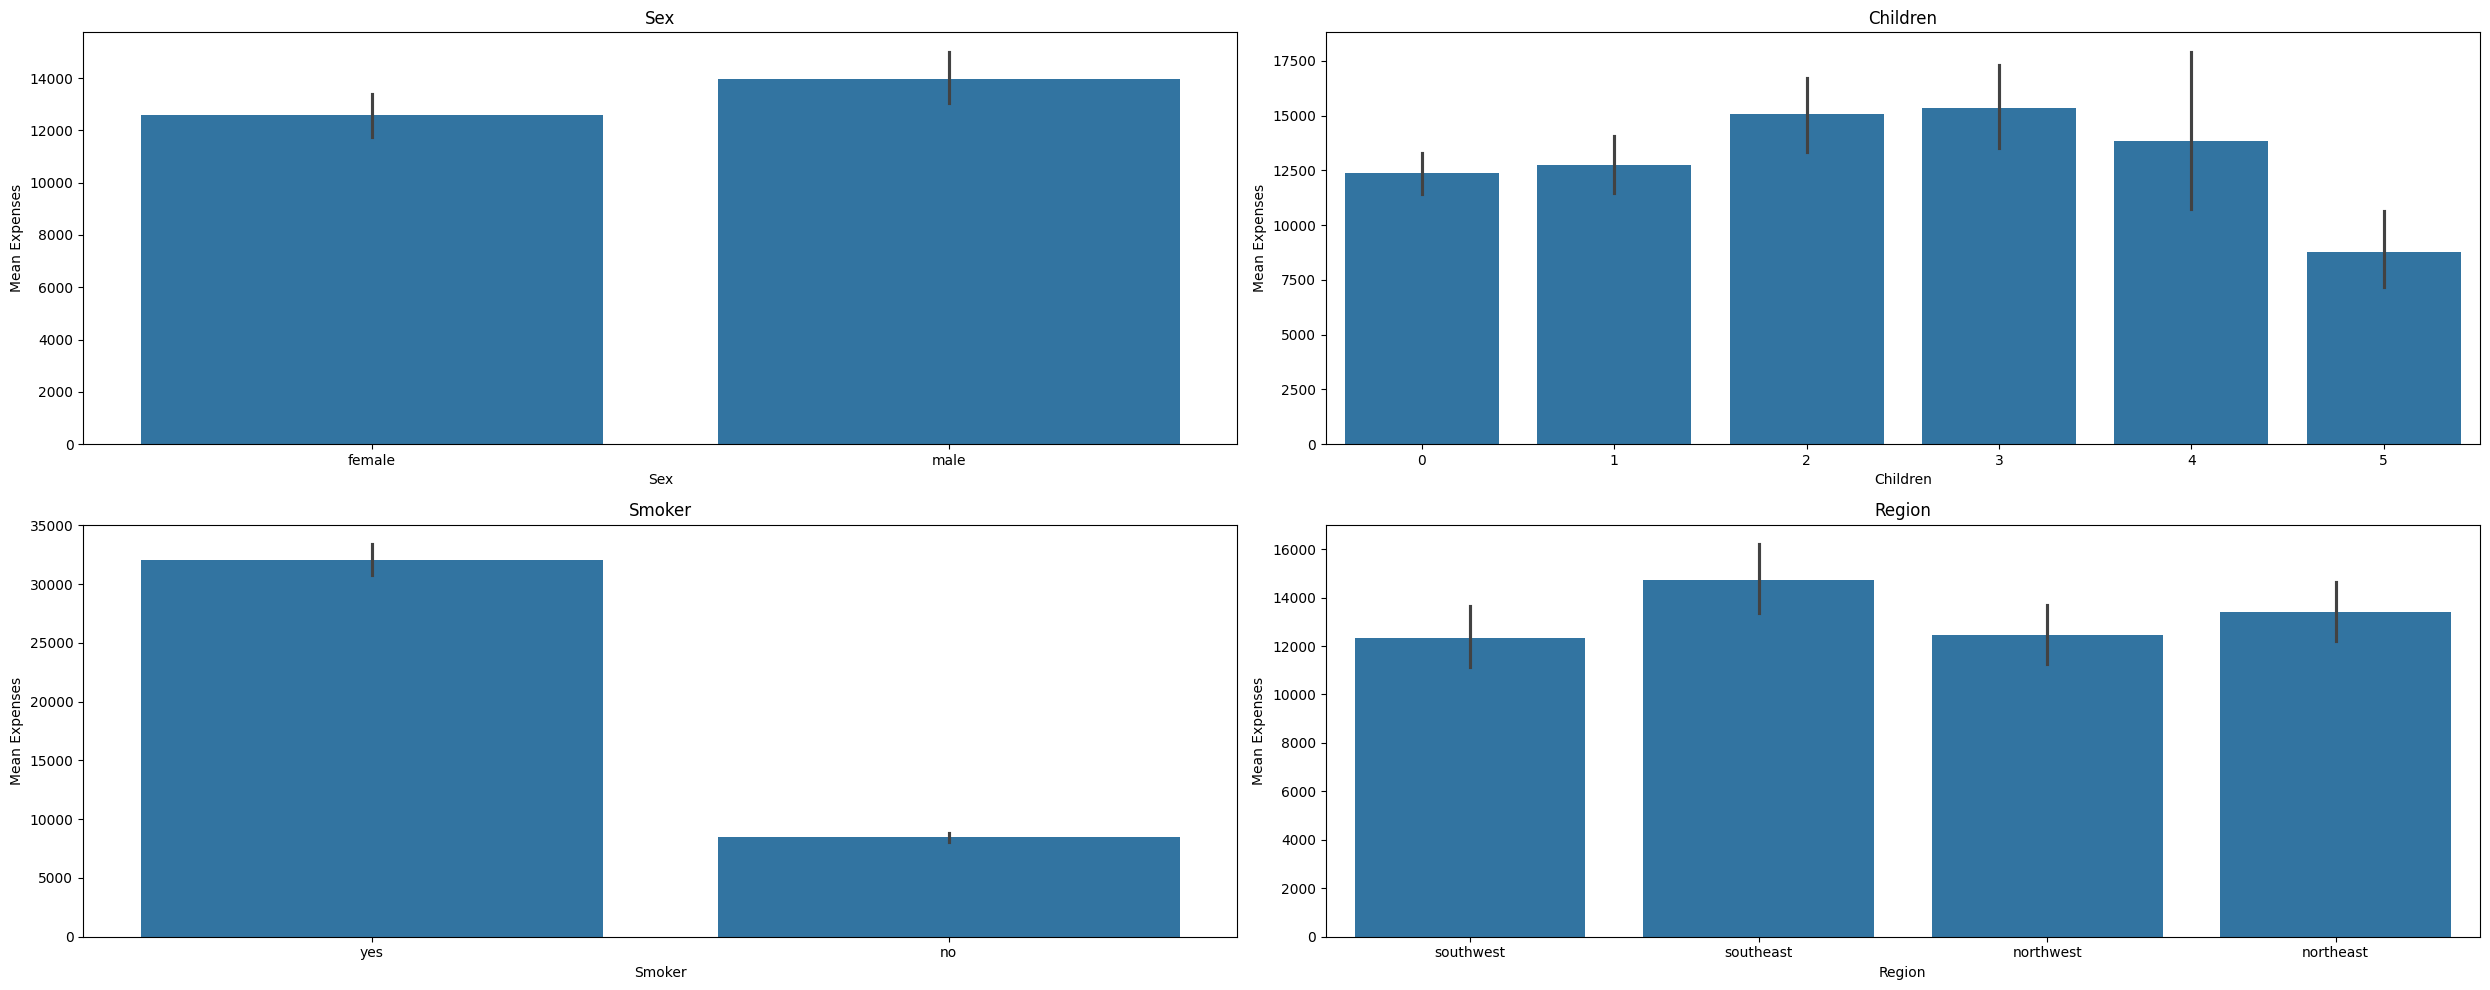

In [ ]:
features_1 = ['sex', 'children', 'smoker', 'region']
plt.subplots(figsize=(25, 10))

for i, col in enumerate(features_1):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=col, y='expenses', data=data, estimator=np.mean)
    plt.title(col.capitalize())
    plt.xlabel(col.capitalize())
    plt.ylabel('Mean Expenses')

plt.tight_layout()
plt.show()

- Customer who are a smoker is charged thrice the insurance price compare to non-smoker
- Male are charged slightly more compare to Female
- Customers who has five children tends to be charged lower compared to custoers who has less than five children
- For region, all of the region is roughly the same

<ipython-input-54-79ce378f8bc0>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


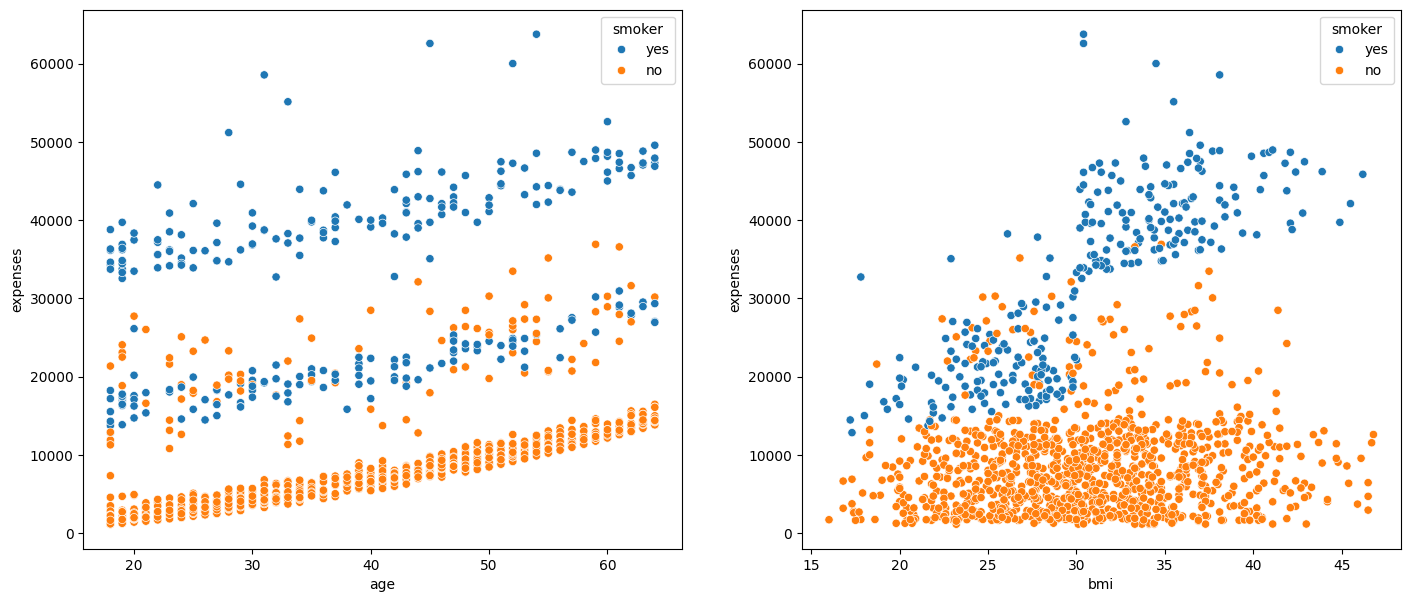

In [ ]:
#Scatter plot of the charges paid v/s age and BMI respectively

features_2 = ['age','bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features_2):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=data, x=col, y='expenses', hue='smoker')
plt.show()

- It is true that non-smokers is charged lower than smokers group.
- As age increases, the medical insurance charges increase (for both smokers and non-smokers group)
- As BMI increases, the charges also increase significantly for smokers.

# Data Preprocessing

Handle Imbalance Dataset : 'smoker' features

Upsampling minority class : smoker = 'yes'

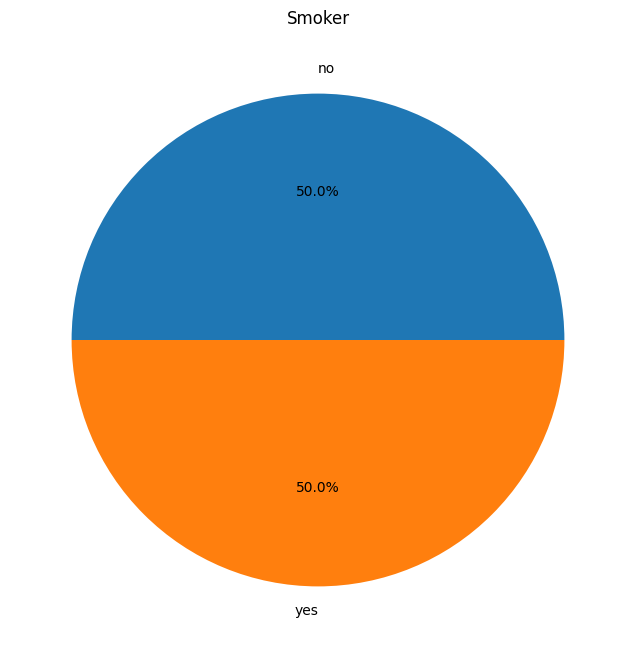

In [ ]:
from sklearn.utils import resample

# Assume 'data' is your DataFrame and 'smoker' is the column you want to downsample
# Separate the majority and minority classes
data_majority = data[data.smoker == 'no']
data_minority = data[data.smoker == 'yes']

# Downsample the majority class
data_minority_upsampled = resample(data_minority,
                                   replace=True,    # sample without replacement
                                   n_samples=len(data_majority),  # match number of minority class
                                   random_state=42)  # reproducible results

# Combine the downsampled majority class with the minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Shuffle the dataset to mix the classes
data = data_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

plt.figure(figsize=(8, 8))

col = 'smoker'  # Specify the column 'smoker'

x = data[col].value_counts()
plt.pie(x.values, labels=x.index, autopct='%1.1f%%')

plt.title(col.capitalize())

plt.show()

<ipython-input-56-7489f83bca57>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


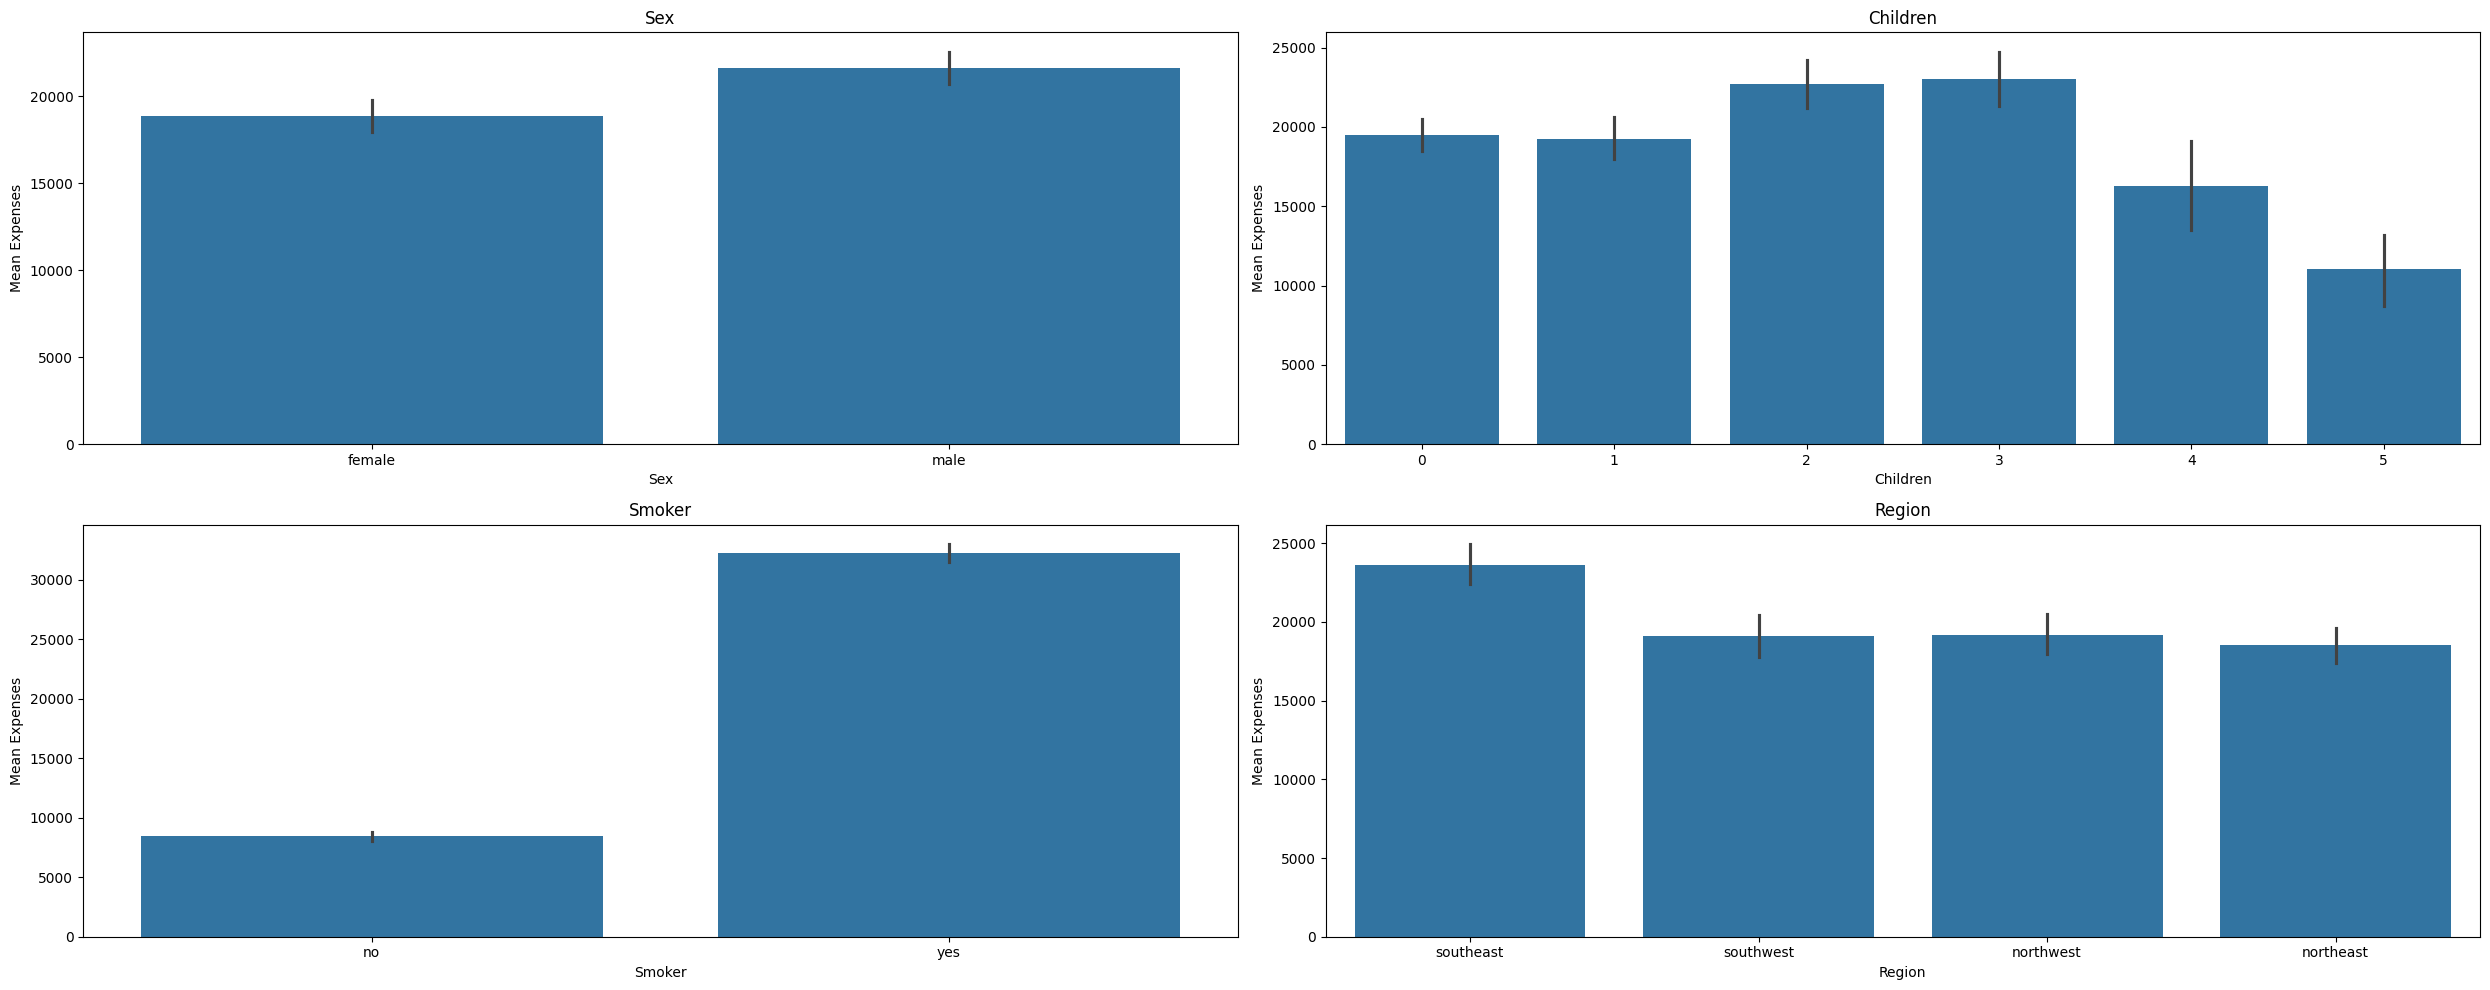

In [ ]:
features_1 = ['sex', 'children', 'smoker', 'region']
plt.subplots(figsize=(25, 10))

for i, col in enumerate(features_1):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=col, y='expenses', data=data, estimator=np.mean)
    plt.title(col.capitalize())
    plt.xlabel(col.capitalize())
    plt.ylabel('Mean Expenses')

plt.tight_layout()
plt.show()

Label Encoder : Use to standardize the categorical data into numerical form

In [ ]:
# checking features
columns = data.select_dtypes(include='O').keys()
# display variabels
print(columns)

# Create a dictionary to store the encoders
encoders = {}

# Apply label encoding to each column
for column in columns:
  encoder = LabelEncoder()
  data[column] = encoder.fit_transform(data[column])
  encoders[column] = encoder

Index(['sex', 'smoker', 'region'], dtype='object')


Display the Features that have been converted

In [ ]:
data[['sex', 'smoker', 'region']]

,sex,smoker,region
0,0,0,2
1,1,1,3
2,0,1,3
3,0,0,1
4,1,1,3
...,...,...,...
2121,0,1,0
2122,0,1,3
2123,1,1,2
2124,0,1,0


'sex' : [Female = 0, Male = 1]

'smoker' : [No = 0, Yes = 1]

'region' : ['northeast' = 0, 'northwest' = 1, 'southeast' = 2, 'southwest' = 3]


Save Cleaned Dataset in Drive

In [ ]:
data.to_csv('/content/drive/MyDrive/Trends In DS/cleaned_dataset.csv', index = False)

# Data Modelling

Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the feature variables (X) and the target variable (y)
X = data.drop(['expenses'], axis=1)
y = data['expenses']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 1700
Testing set size: 426


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

Mean Squared Error: 54257778.64419865
Mean Absolute Error: 5888.244625513121
R-squared: 0.7905942599705005
Root Mean Squared Error: 7365.987961176603


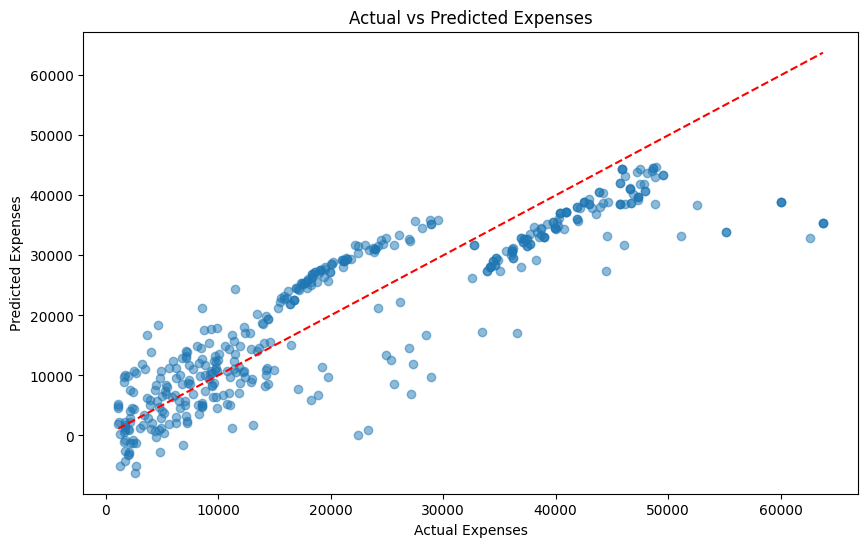

In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

# Visualize the comparison between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs Predicted Expenses')
plt.show()

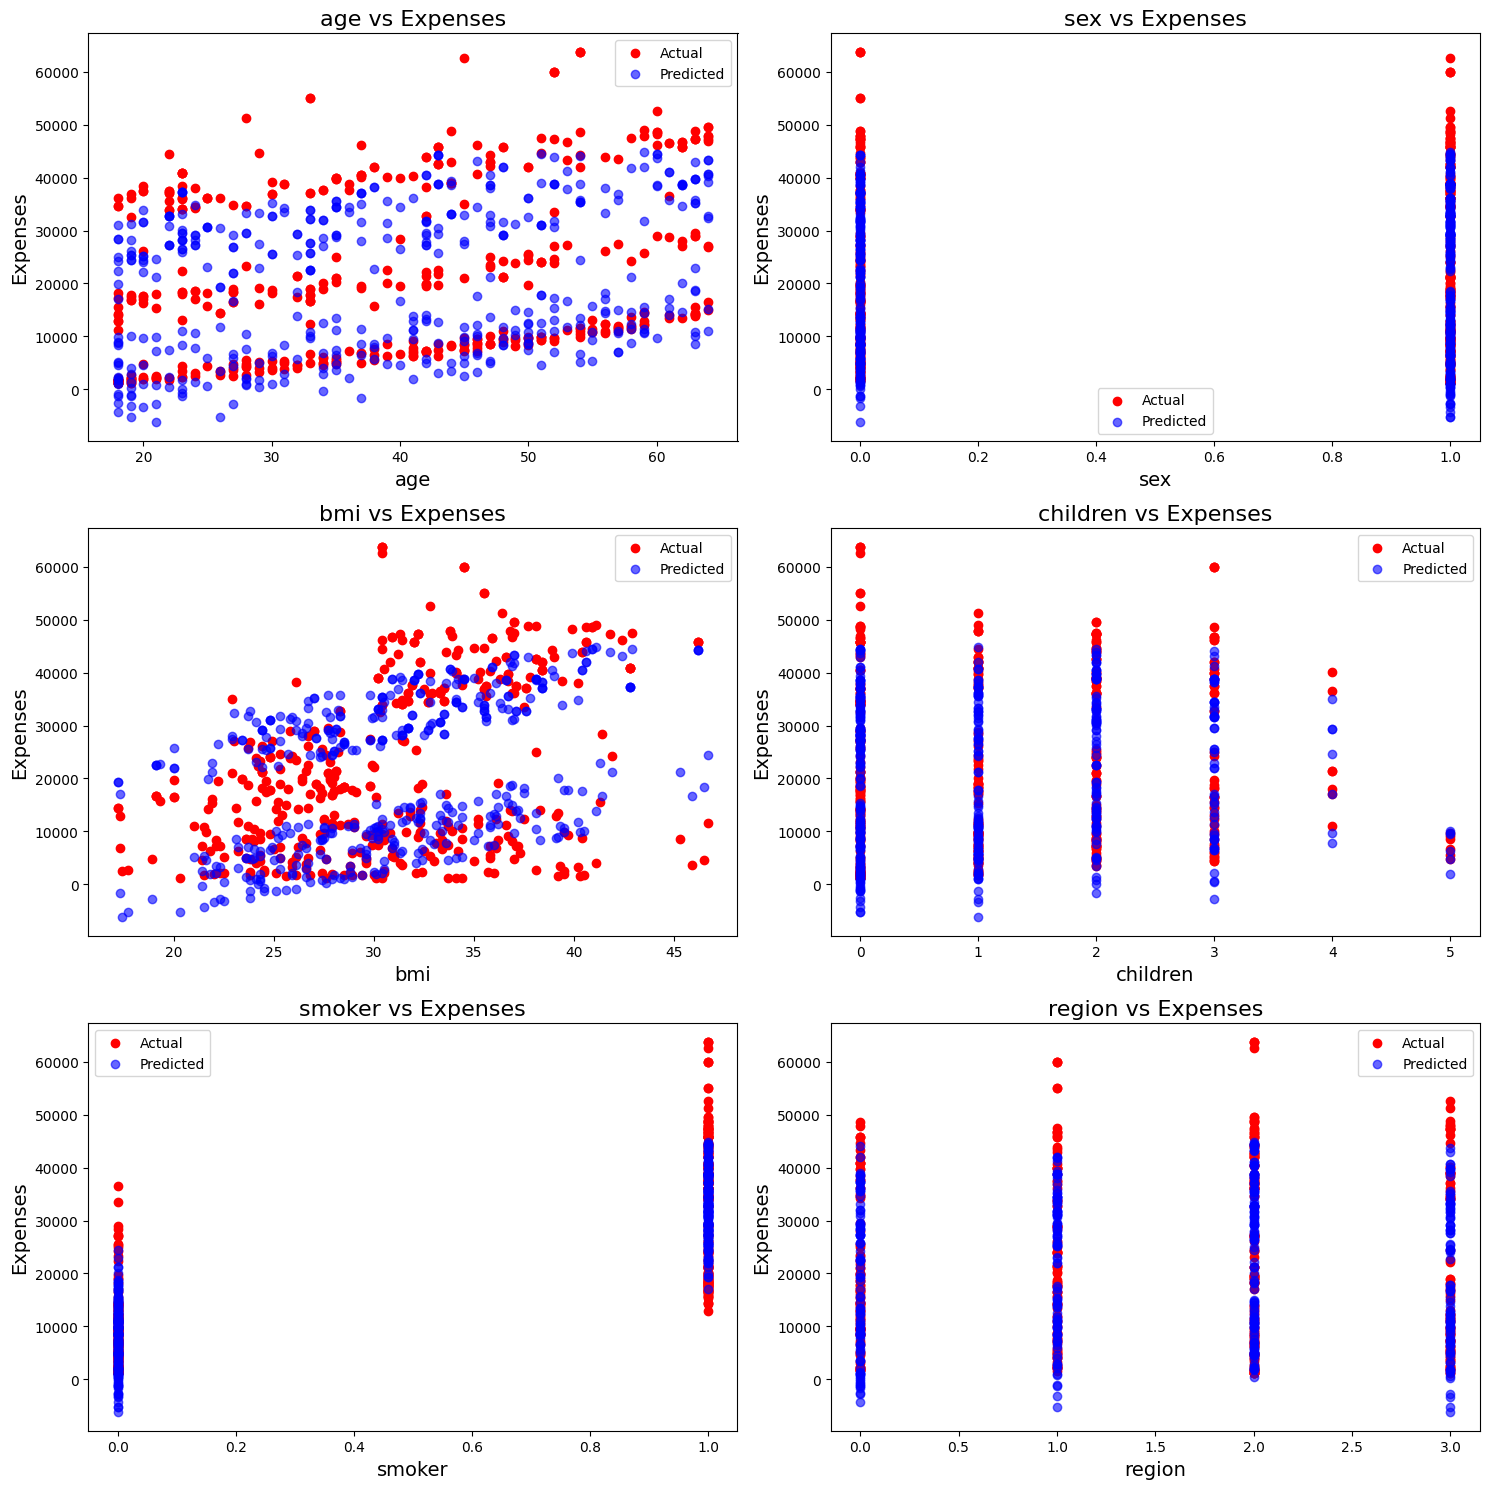

In [ ]:
# Plot all predictors vs actual and predicted expenses
predictors = X.columns
num_predictors = len(predictors)
num_cols = 2
num_rows = (num_predictors + 1) // num_cols  # calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # flatten the 2D array of axes to 1D for easier indexing

for i, predictor in enumerate(predictors):
    axes[i].scatter(X_test[predictor], y_test, color='red', label='Actual')
    axes[i].scatter(X_test[predictor], y_pred, color='blue', label='Predicted', alpha=0.6)
    axes[i].set_title(f'{predictor} vs Expenses', fontsize=16)
    axes[i].set_xlabel(predictor, fontsize=14)
    axes[i].set_ylabel('Expenses', fontsize=14)
    axes[i].legend()

# Remove any unused subplots if the number of predictors is odd
for i in range(num_predictors, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# Determine the importance of each feature
coefficients = model.coef_
features = X.columns

# Create a DataFrame to display the feature importance
importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Print the top 3 most important factors
top_5_factors = importance.reindex(importance['Coefficient'].abs().sort_values(ascending=False).index)[:5]
print("Top 5 Important Factors:")
print(top_5_factors)

Top 5 Important Factors:
    Feature   Coefficient
4    smoker  11895.735445
2       bmi   4482.793818
0       age   3587.831606
3  children    447.045785
1       sex   -118.845885


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define the polynomial regression function
def polynomial_regression(degree, X_train_scaled, y_train_, X_test_scaled, y_test):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Polynomial Degree: {degree}')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')
    print(f'Root Mean Squared Error: {rmse}')

    # Visualize the comparison between actual and predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Expenses')
    plt.ylabel('Predicted Expenses')
    plt.title(f'Actual vs Predicted Expenses (Degree: {degree})')
    plt.show()

    return model, poly

Polynomial Degree: 2
Mean Squared Error: 35405319.701304466
Mean Absolute Error: 3790.0281455399067
R-squared: 0.863354575909727
Root Mean Squared Error: 5950.236944971559


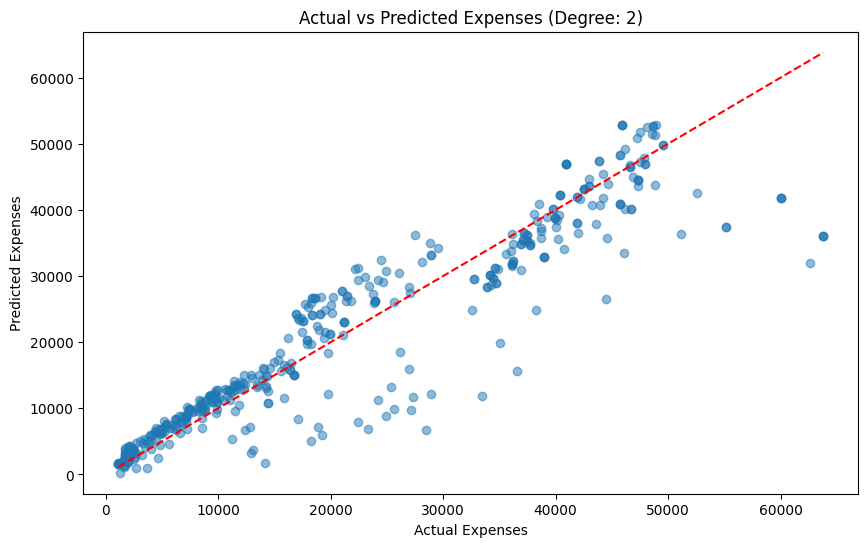

Polynomial Degree: 3
Mean Squared Error: 32568497.55308887
Mean Absolute Error: 3594.8124002347417
R-squared: 0.8743031782322565
Root Mean Squared Error: 5706.881596203733


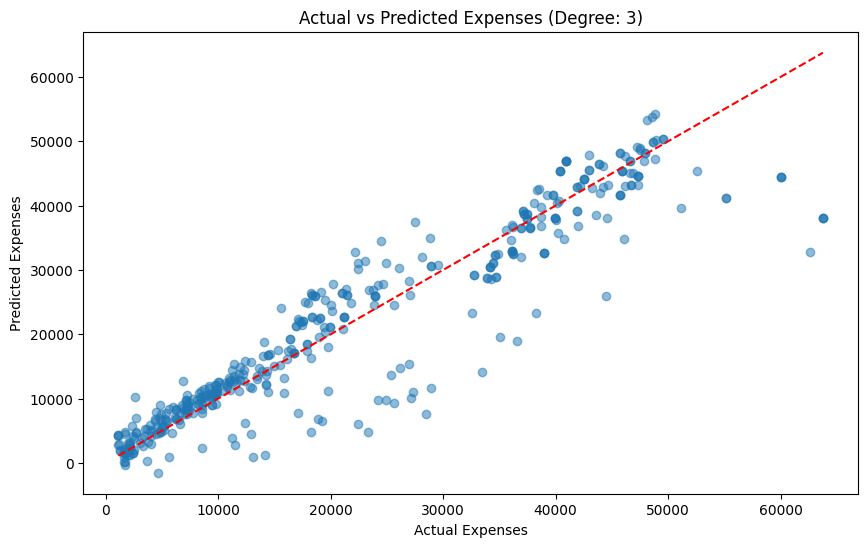

In [ ]:
# Polynomial Regression (degree=2)
model_poly2, poly2 = polynomial_regression(2, X_train_scaled, y_train, X_test_scaled, y_test)

# Polynomial Regression (degree=3)
model_poly3, poly3 = polynomial_regression(3, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
# Extract feature importances for the polynomial model
def get_feature_importance(model, poly, feature_names):
    # Get the polynomial feature names
    poly_features = poly.get_feature_names_out(feature_names)
    coefficients = model.coef_

    # Create a DataFrame to display the feature importance
    importance = pd.DataFrame({'Feature': poly_features, 'Coefficient': coefficients})

    # Print feature importance sorted by the absolute value of coefficients
    return importance.sort_values(by='Coefficient', ascending=False)

Top 5 features for polynomial degree 2 regression:
       Feature   Coefficient
2          sex  1.540622e+15
5       smoker  1.549784e+14
0            1  2.901536e+11
3          bmi  4.518730e+03
20  bmi smoker  4.469098e+03


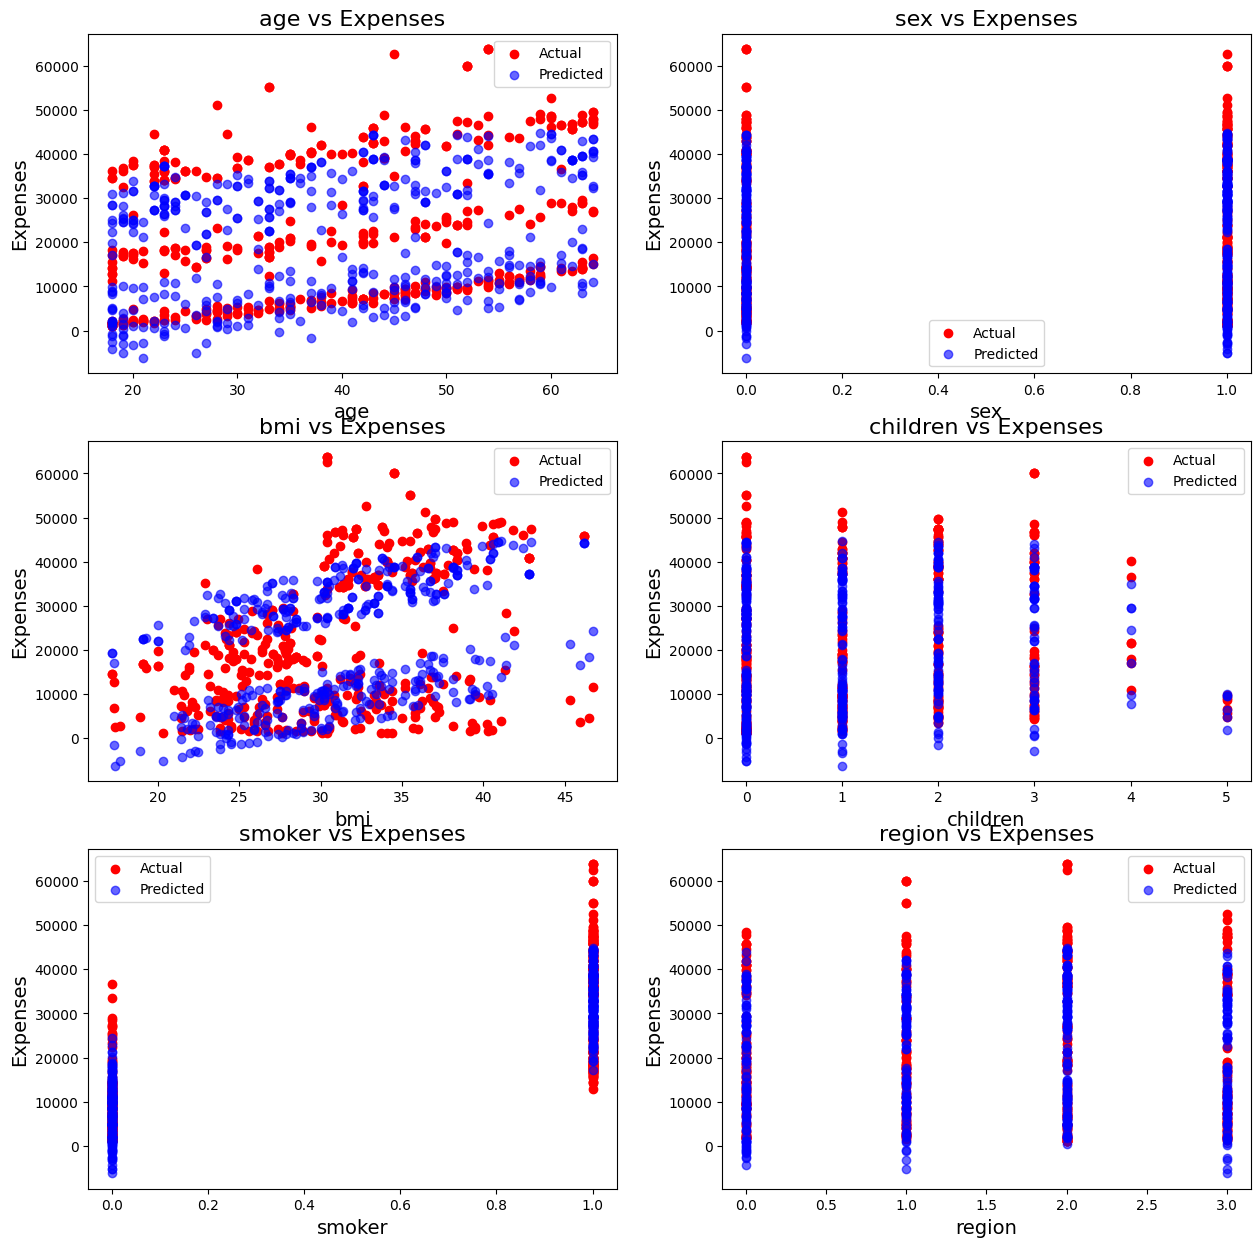

In [ ]:
# Extract feature importances for the polynomial model
importance_poly2 = get_feature_importance(model_poly2, poly2, X.columns)

# Select only the top 5 features for polynomial degree 2 regression
top_features_poly2 = importance_poly2.iloc[1:].nlargest(5, 'Coefficient')
print("Top 5 features for polynomial degree 2 regression:")
print(top_features_poly2)

# Plot all predictors vs actual and predicted expenses
predictors = X.columns
num_predictors = len(predictors)
num_cols = 2
num_rows = (num_predictors + 1) // num_cols  # calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # flatten the 2D array of axes to 1D for easier indexing

for i, predictor in enumerate(predictors):
  axes[i].scatter(X_test[predictor], y_test, color='red', label='Actual')
  axes[i].scatter(X_test[predictor], y_pred, color='blue', label='Predicted', alpha=0.6)
  axes[i].set_title(f'{predictor} vs Expenses', fontsize=16)
  axes[i].set_xlabel(predictor, fontsize=14)
  axes[i].set_ylabel('Expenses', fontsize=14)
  axes[i].legend()
# Remove any unused subplots if the number of predictors is odd
for i in range(num_predictors, num_rows * num_cols):
  fig.delaxes(axes[i])
  plt.tight_layout()
  plt.show()

Top 5 features for polynomial degree 3 regression:
            Feature   Coefficient
52     sex^2 smoker  1.007968e+15
4          children  1.001013e+15
2               sex  5.186761e+14
81  smoker^2 region  4.262481e+14
3               bmi  3.892841e+14


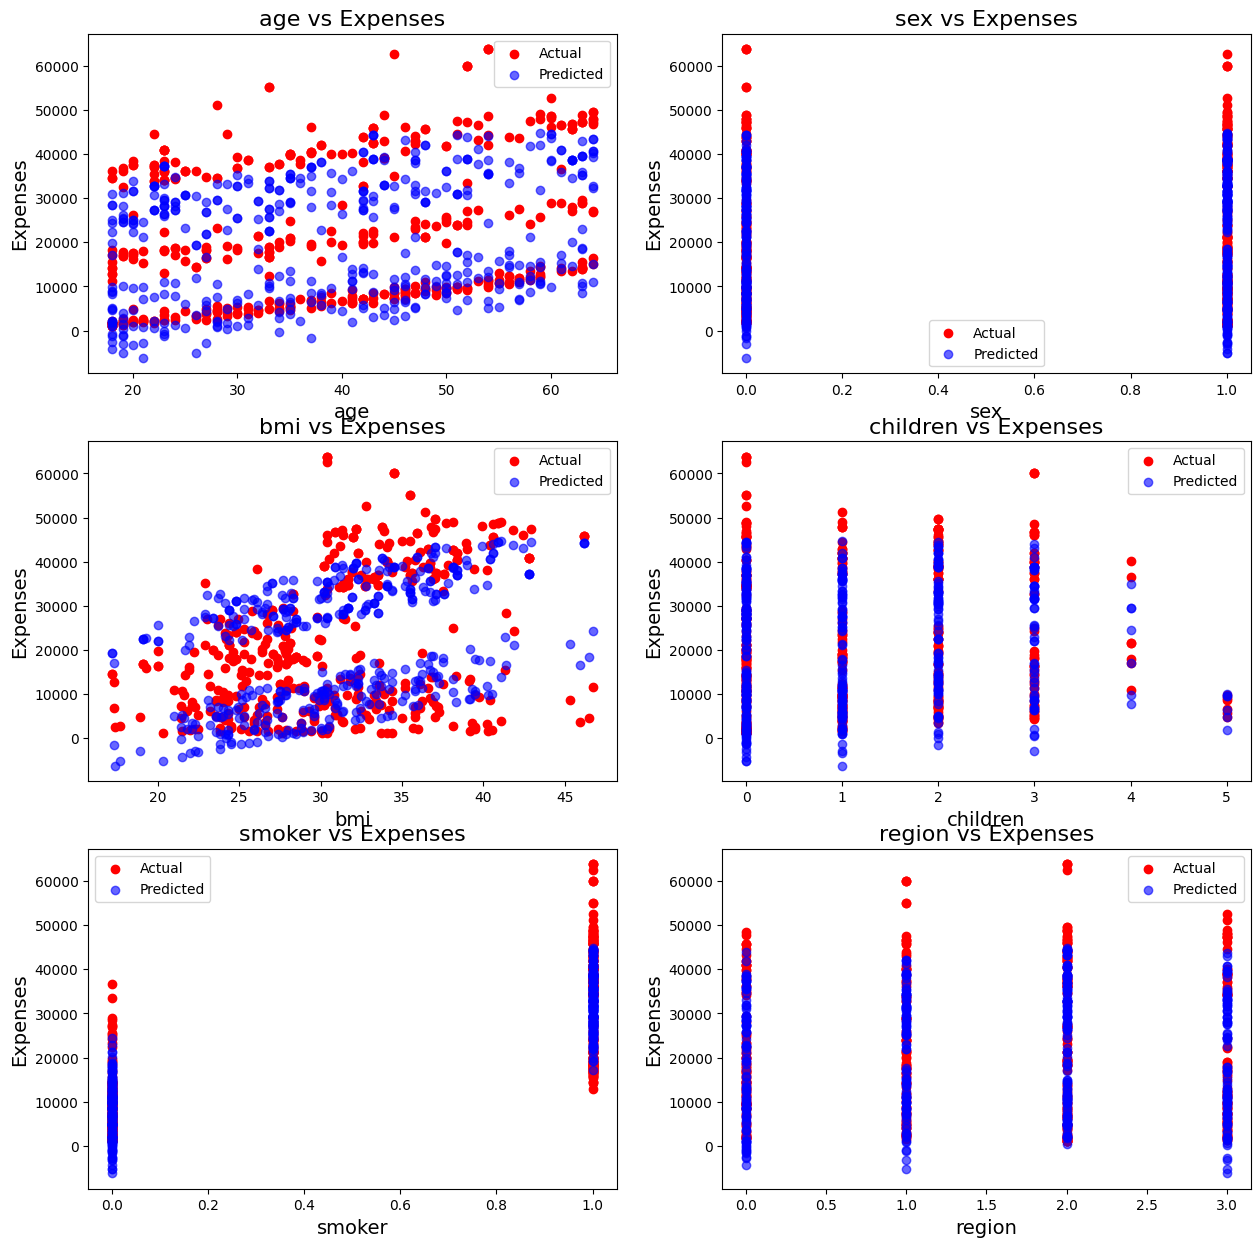

In [ ]:
# Extract feature importances for the polynomial model
importance_poly3 = get_feature_importance(model_poly3, poly3, X.columns)

# Select only the top 5 features for polynomial degree 3 regression
top_features_poly3 = importance_poly3.iloc[1:].nlargest(5, 'Coefficient')
print("Top 5 features for polynomial degree 3 regression:")
print(top_features_poly3)

# Plot all predictors vs actual and predicted expenses
predictors = X.columns
num_predictors = len(predictors)
num_cols = 2
num_rows = (num_predictors + 1) // num_cols  # calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # flatten the 2D array of axes to 1D for easier indexing

for i, predictor in enumerate(predictors):
  axes[i].scatter(X_test[predictor], y_test, color='red', label='Actual')
  axes[i].scatter(X_test[predictor], y_pred, color='blue', label='Predicted', alpha=0.6)
  axes[i].set_title(f'{predictor} vs Expenses', fontsize=16)
  axes[i].set_xlabel(predictor, fontsize=14)
  axes[i].set_ylabel('Expenses', fontsize=14)
  axes[i].legend()
# Remove any unused subplots if the number of predictors is odd
for i in range(num_predictors, num_rows * num_cols):
  fig.delaxes(axes[i])
  plt.tight_layout()
  plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_rf)

# Calculate the R-squared value
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf = np.sqrt(mse_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'Mean Absolute Error (Random Forest): {mae}')
print(f'R-squared (Random Forest): {r2_rf}')
print(f'Root Mean Squared Error (Random Forest): {rmse_rf}')

Mean Squared Error (Random Forest): 14057512.481236992
Mean Absolute Error (Random Forest): 1577.623333041585
R-squared (Random Forest): 0.9457455893391591
Root Mean Squared Error (Random Forest): 3749.33493852403


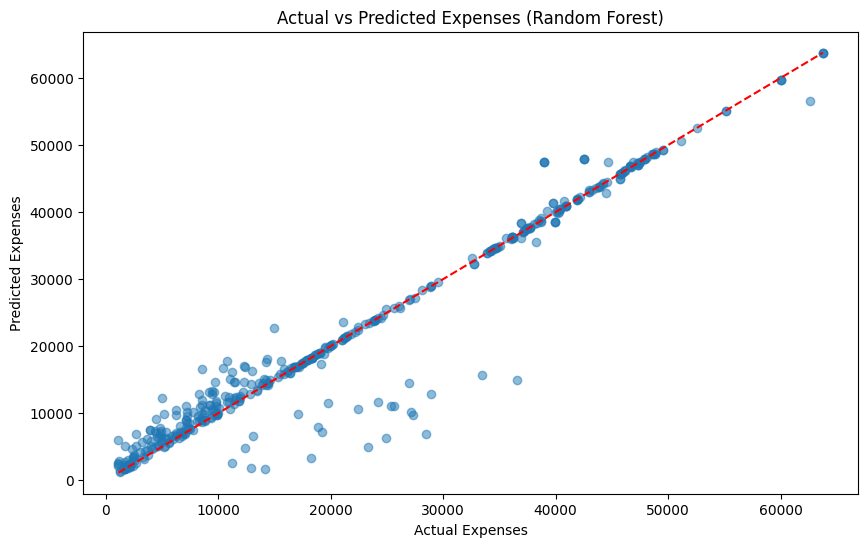

In [ ]:
# Actual vs Predicted Values Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs Predicted Expenses (Random Forest)')
plt.show()

In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display the feature importance
importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Select the top 5 features
top_features_rf = importance_rf.nlargest(5, 'Importance')

print("Top 5 features for Random Forest regression:")
print(top_features_rf)

Top 5 features for Random Forest regression:
    Feature  Importance
4    smoker    0.615826
2       bmi    0.278611
0       age    0.085786
3  children    0.008636
5    region    0.007454


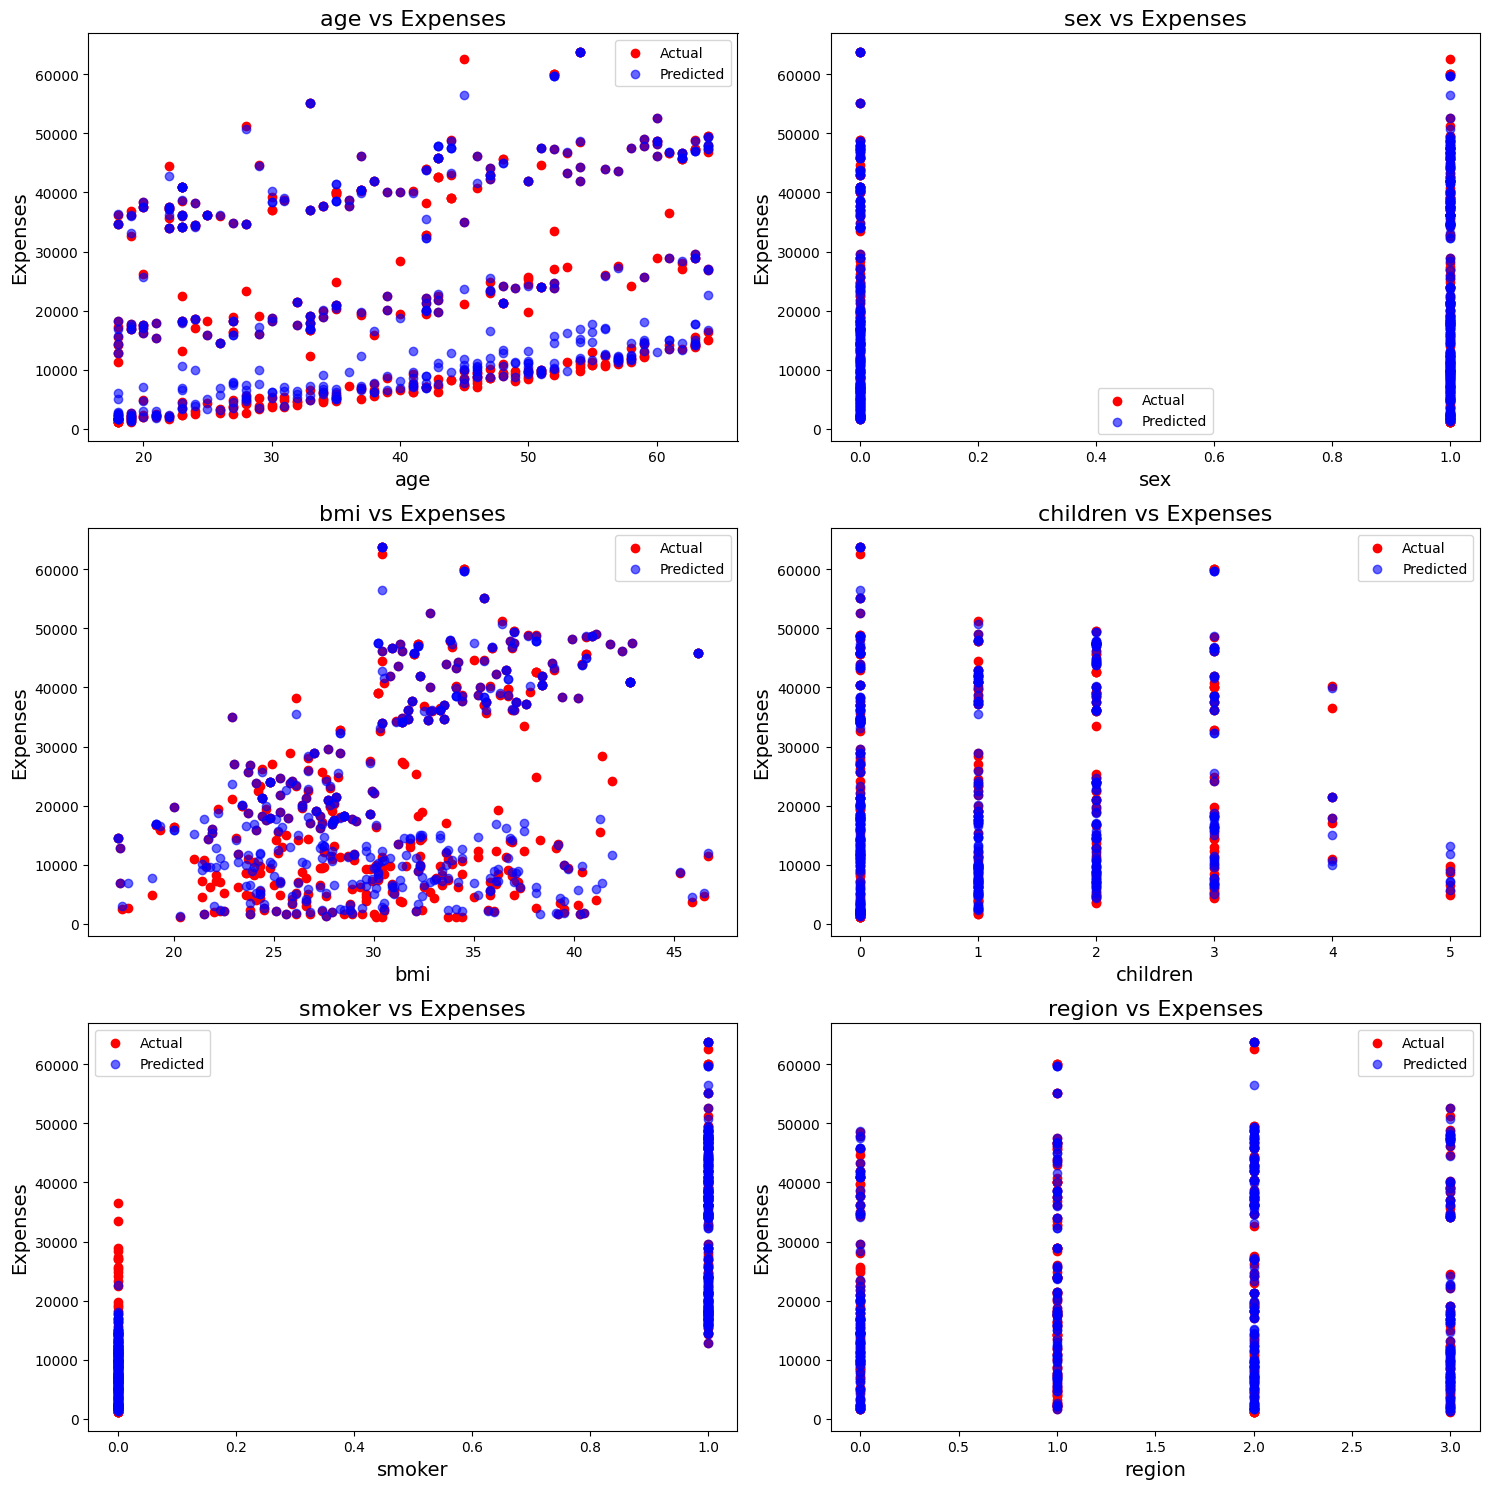

In [ ]:
# Plot all predictors vs actual and predicted expenses
predictors = X.columns
num_predictors = len(predictors)
num_cols = 2
num_rows = (num_predictors + 1) // num_cols  # calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # flatten the 2D array of axes to 1D for easier indexing

for i, predictor in enumerate(predictors):
    axes[i].scatter(X_test[predictor], y_test, color='red', label='Actual')
    axes[i].scatter(X_test[predictor], y_pred_rf, color='blue', label='Predicted', alpha=0.6)
    axes[i].set_title(f'{predictor} vs Expenses', fontsize=16)
    axes[i].set_xlabel(predictor, fontsize=14)
    axes[i].set_ylabel('Expenses', fontsize=14)
    axes[i].legend()

# Remove any unused subplots if the number of predictors is odd
for i in range(num_predictors, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Predict new input

In [ ]:
# Example new input data for a single individual
new_data_single = pd.DataFrame({
    'age': [45],
    'bmi': [34],
    'children': [2],
    'sex': [1],
    'smoker': [1],
    'region': [2]
    # Include other features if applicable, excluding 'expenses'
})

# Ensure the columns are in the same order as they were during training
new_data_single = new_data_single[X.columns]

# Make predictions using the trained Random Forest model
single_prediction = rf_model.predict(new_data_single)

# Display the prediction
print("Prediction for new input data:")
print(single_prediction)

Prediction for new input data:
[41816.9599]
